In [1]:
%tensorflow_version 2.x

#### DenseNet 參考：https://kknews.cc/zh-tw/code/p99plpp.html


In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 2 類 為 bird


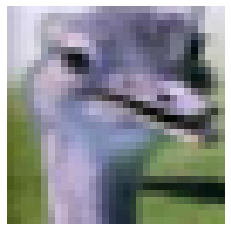

In [5]:
import  random
import matplotlib.pyplot as plt
%matplotlib inline
p = random.randint(0, 49999)
plt.axis("off")
n = int(y_train[p])
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import DenseNet121
cnn = DenseNet121(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam", metrics=["accuracy"])

In [9]:
from tensorflow.keras.callbacks import  EarlyStopping, ModelCheckpoint
callback = [EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_DenseNet121.h5", save_best_only=True)]
history = model.fit(x_train, y_train,
          batch_size=200, epochs=20,
          validation_split=0.1, callbacks=callback)

Epoch 1/20
225/225 [==============================] - 148s 658ms/step - loss: 2.1743 - accuracy: 0.3842 - val_loss: 1.5258 - val_accuracy: 0.4646
Epoch 2/20
225/225 [==============================] - 146s 648ms/step - loss: 1.4535 - accuracy: 0.4919 - val_loss: 1.3842 - val_accuracy: 0.5218
Epoch 3/20
225/225 [==============================] - 141s 626ms/step - loss: 1.3439 - accuracy: 0.5277 - val_loss: 1.3503 - val_accuracy: 0.5282
Epoch 4/20
225/225 [==============================] - 135s 602ms/step - loss: 1.2864 - accuracy: 0.5479 - val_loss: 1.2907 - val_accuracy: 0.5432
Epoch 5/20
225/225 [==============================] - 136s 604ms/step - loss: 1.2467 - accuracy: 0.5602 - val_loss: 1.2776 - val_accuracy: 0.5488
Epoch 6/20
225/225 [==============================] - 136s 605ms/step - loss: 1.2199 - accuracy: 0.5710 - val_loss: 1.2553 - val_accuracy: 0.5542
Epoch 7/20
225/225 [==============================] - 138s 612ms/step - loss: 1.1956 - accuracy: 0.5790 - val_loss: 1.2438 -

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 33s 107ms/step - loss: 1.2706 - accuracy: 0.5564


[1.2706319093704224, 0.5564000010490417]

In [16]:
pre = model.predict(x_test)

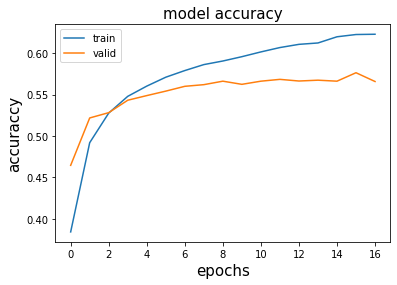

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("model accuracy", fontsize=15)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuraccy",  fontsize=15)
plt.legend(["train", "valid"])